# Week 13 - Network Basics

#### Configure your serial connection to your microcontroller. Use the following commands to establish a serial connection.
##### Example
#### For Windows
 %serialconnect to --port=COM3 --baud=115200
#### For macOS
 %serialconnect to --port=/dev/tty.SLAB_USBtoUART --baud=115200

### Importance of Wi-Fi in Internet of Things (Iot)
➡️	Wi-Fi is a commonly used wireless communication technology that enables devices to connect to the internet, making it essential for IoT applications.

➡️	With Wi-Fi, IoT devices can send and receive data, enabling real-time monitoring, remote control, and data sharing.

### Example code:

    import network
    import time
    
    ssid = "CyFi"
    password = "SecurityA40"
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting to Wi-Fi...")
        time.sleep(1)
    
    print("Connected to Wi-Fi", station.ifconfig())

####  network.STA_IF (Station Mode):
➡️ The **network.STA_IF** mode is used to configure the Raspberry Pi Pico W as a station (client) in a Wi-Fi network.

➡️ In this mode, the Pico W can connect to a local Wi-Fi router, just like a laptop or smartphone would.

➡️ This is commonly used in IoT applications where the device needs to send data to the internet or receive commands from other devices.
####  Purpose of active() and connect() Methods:
➡️ **active(True)**: This method is used to activate the network interface. Before the Pico W can connect to any Wi-Fi network, the network interface must be activated by calling active(True).
   
**Example:** 

    station.active(True) enables the network interface.
    
➡️	**connect(ssid, password)**: This method is used to connect to a Wi-Fi network by specifying the SSID (network name) and password.

**Example:** 

    station.connect("WiFi_Name", "Password") connects the Pico W to the specified Wi-Fi network.
    
#### ifconfig() for Displaying IP Address:
➡️	The **ifconfig()** method provides information about the network interface, including the device’s IP address, subnet mask, gateway, and DNS.

➡️	After successfully connecting to a Wi-Fi network, you can use **station.ifconfig()** to check the IP address assigned to the Pico W.
   
**Example:** 

    print(station.ifconfig()) 
will print details like ('192.168.1.2', '255.255.255.0', '192.168.1.1', '192.168.1.1'), where the first value is the device's IP address.



## Fetching data from JSON Placeholder

**What is urequests?**
urequests is a MicroPython library that enables your microcontroller (such as the Raspberry Pi Pico W) to send HTTP requests over the internet, just like your browser does when you visit a website.

### How urequests Works (Step-by-Step)
**1. Import the Library** 

    import urequests 
    
This loads the urequests module so you can use its functions like .get(), .post(), etc.

**2. Send an HTTP Request**

    response = urequests.get('http://jsonplaceholder.typicode.com/albums/1')

**This line does 3 things:**

➡️ Opens a connection to the server (jsonplaceholder.typicode.com)

➡️ Sends a GET request asking for data

➡️ Waits for the server to send a response

**3. Access the Data**
You can read the response with:

➡️ response.text                        # raw text

➡️ response.json()                      # converts JSON to a Python dictionary

➡️ response.status_code                  # HTTP status code

    

### Example Code: 
    import network
    import time
    import urequests
    
    ssid = "CyFi"
    password = "SecurityA40"
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting to Wi-Fi...")
        time.sleep(1)
    
    print("Connected to Wi-Fi", station.ifconfig())
    
    response = urequests.get('http://jsonplaceholder.typicode.com/albums/1')
    print(response.json())


## Resources

**Network Basics**

https://docs.micropython.org/en/latest/esp8266/tutorial/network_basics.html

**jsonplaceholder {JSON}**

https://jsonplaceholder.typicode.com/

**Network Request Module(urequest)**

https://makeblock-micropython-api.readthedocs.io/en/latest/public_library/Third-party-libraries/urequests.html

## Fetching data from MokApi

**What is MockAPI?**

MockAPI is a free online tool that allows you to simulate (mock) RESTful APIs. It provides fake endpoints and data, which is useful for testing HTTP requests without needing a real backend server.

**Example**

    url = "https://681d50bef74de1d219af6197.mockapi.io/api/v1/newuser"
    
This is a fake endpoint created on MockAPI. It contains fake user data in JSON format.

**How it works together in the code:**

1. Connect to Wi-Fi using **network** module.

2. Send a **GET** request to MockAPI using **urequests.get(url)**.

3. Receive JSON data from the fake server.

4. Print each record from the data.


### Example Code:

    import network
    import urequests
    
    ssid = "CyFi"
    password = "SecurityA40"
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting to Wi-Fi...")
        time.sleep(1)
    
    print("Connected to Wi-Fi", station.ifconfig())
    
    
    def fetch_data():
        url = "https://681d50bef74de1d219af6197.mockapi.io/api/v1/newuser"
        try:
            response = urequests.get(url)
            data = response.json()
            
            print("Data received from MockAPI:", response)
            for city in data:
                print(city)
                  
        except Exception as e:
            print("Failed to fetch data:", e)
    
    fetch_data()

## Resources

**Network Basics**

https://docs.micropython.org/en/latest/esp8266/tutorial/network_basics.html

**Mockapi**

https://mockapi.io/projects

**Network Request Module(urequest)**

https://makeblock-micropython-api.readthedocs.io/en/latest/public_library/Third-party-libraries/urequests.html



## Post data from MokApi

MockAPI is a fake REST API for testing. It mimics the behavior of a real backend server. When you send a POST request to a MockAPI endpoint:

⏩ It receives the data you send.

⏩ It stores it temporarily (like a database).

⏩ It responds with a copy of the data, often including an auto-generated ID.

The **urequests.post()** function in MicroPython sends an HTTP POST request to a server, usually to add new data. In this case, it's used to send data to the MockAPI server.
**Example**
    response = urequests.post(url, json=data)

⏩ url is the MockAPI endpoint.

⏩ json=data converts your Python dictionary (data) into a JSON-formatted request body.

**How the Code Works**

1. Connects to Wi-Fi using the **network** module.

2. Sends a **POST** request with name, city, and country to MockAPI.

3. MockAPI receives it, stores it, and returns a response.


### Example Code:

    import network
    import urequests
    
    ssid = "CyFi"
    password = "SecurityA40"
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting to Wi-Fi...")
        time.sleep(1)
    
    print("Connected to Wi-Fi", station.ifconfig())
    
            
    def post_data():
        url = "https://681d50bef74de1d219af6197.mockapi.io/api/v1/newuser"
        data = {
            "name":"John",
            "city": "Melbourne",
            "country":"Australia",
        }
        try:
            response = urequests.post(url, json=data)
            print("Data posted to MockAPI:")
            print(response.json())  
        except Exception:
            print("Failed to post data:")
    
    post_data()


## Resources

**Network Basics**

https://docs.micropython.org/en/latest/esp8266/tutorial/network_basics.html

**Mockapi**

https://mockapi.io/projects

**Network Request Module(urequest)**

https://makeblock-micropython-api.readthedocs.io/en/latest/public_library/Third-party-libraries/urequests.html




## Post data from Supabase
The **urequests.post()** function allows you to send data to a Supabase database using its REST API. Supabase provides an auto-generated RESTful API for each table in your project, making it easy to insert, read, update, or delete data via HTTP requests.

**Here's how it works:**

•	You send a POST request to the Supabase URL for your table, e.g.

    https://your-project.supabase.co/rest/v1/customer

•	The data to insert is written as a Python dictionary, like:

    data = {
        "firstname": "John",
    	"lastname": "Doe",
        "age": 30
    }
    
•	This data is automatically converted to JSON using **json=data ** in the request.


HTTP headers are key-value pairs included in web requests that provide essential information to the server, such as the type of data being sent, authentication credentials, or client identity. In a POST request to Supabase, headers like ** "Content-Type": "application/json"**  specify the data format, while** "apikey"** and **"Authorization"** authenticate the request and identify your project. These headers ensure the server understands and authorises the incoming request properly.

**You must include HTTP headers:**

➡️	**"apikey":** your Supabase project **anon/public API key**

➡️	**"Authorization":** usually **"Bearer your-anon-key"**

➡️	**"Content-Type":** must be **"application/json"**

     headers = {
                "apikey": "your-anon-key",
                "Authorization": "Bearer your-anon-key",
                "Content-Type": "application/json"
            }
            

### Example Code:
    import network
    import urequests
    import time
    
    ssid = 'YourWiFiSSID'
    password = 'YourWiFiPassword'
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting...")
        time.sleep(1)
    
    print("Connected:", station.ifconfig())
    
    def post_to_supabase():
        url = "https://your-project-ref.supabase.co/rest/v1/customer"
        data = {
            "firstname": "John",
            "lastname": "Doe",
            "age": "30"
        }
    
        headers = {
            "apikey": "your-anon-key",
            "Authorization": "Bearer your-anon-key",
            "Content-Type": "application/json"
        }
    
        try:
            response = urequests.post(url, json=data, headers=headers)
            print("Posted:", response.json())
            response.close()
        except Exception as e:
            print("Error:", e)
    
    post_to_supabase()



## Resources

**Network Basics**

https://docs.micropython.org/en/latest/esp8266/tutorial/network_basics.html

**Creating API Routes**

https://supabase.com/docs/guides/api/creating-routes

**Network Request Module(urequest)**

https://makeblock-micropython-api.readthedocs.io/en/latest/public_library/Third-party-libraries/urequests.html


## Fetching data from Supabase

A **GET** request is used to read data from your Supabase database using a URL. Supabase automatically provides RESTful access to each table in your project using a PostgREST interface.

**How It Works**

➡️ You send an HTTP **GET** request to the Supabase REST endpoint:

**Example**

    https://<your-project>.supabase.co/rest/v1/<table-name>
    
This returns all rows from the customer table.

➡️ You can add filters to get specific records. For example:

    ?id=eq.5
    
means "fetch only the row where id equals 5".

➡️ Supabase uses standard PostgREST operators like:

    ⏩ eq. → equals

    ⏩ lt. → less than
    
    ⏩ gt. → greater than
    
    ⏩ like. → pattern match
    
    ⏩ and, or → combine conditions


➡️ The request must include **HTTP headers**:

    headers = {
        "apikey": "your-anon-key",
        "Authorization": "Bearer your-anon-key"
    }

### Example Code:

    import network
    import urequests
    import time
    
    ssid = 'YourWiFiSSID'
    password = 'YourWiFiPassword'
    
    station = network.WLAN(network.STA_IF)
    station.active(True)
    station.connect(ssid, password)
    
    while not station.isconnected():
        print("Connecting...")
        time.sleep(1)
    
    print("Connected:", station.ifconfig())
    
    
    
    def fetch_data_supabase(id):
        url = f"https://your-project-ref.supabase.co/rest/v1/customer?id=eq.{id}"
        
        headers = {
            "apikey": "your-anon-key",
            "Authorization": "Bearer your-anon-key",
            "Content-Type": "application/json"
        }
    
        try:
            response = urequests.get(url, headers=headers)
            data = response.json()
            print("Fetched data:", data)
            response.close()
        except Exception as e:
            print("Error:", e)
    
    fetch_data_supabase(1)


## Resources

**Network Basics**

https://docs.micropython.org/en/latest/esp8266/tutorial/network_basics.html

**Creating API Routes**

https://supabase.com/docs/guides/api/creating-routes

**Network Request Module(urequest)**

https://makeblock-micropython-api.readthedocs.io/en/latest/public_library/Third-party-libraries/urequests.html

## Task - 1  Send DHT11 Sensor Data to Supabase

Read temperature and humidity from a DHT11 sensor using the Raspberry Pi Pico W and send this data to a Supabase database via an HTTP POST request.

### Hardware Requirements
1. Breadboard
2. DHT11
3. Pi Pico
4. Jumper wires

## Task - 2  Fetch Temperature and Humidity from Supabase

Use a Raspberry Pi Pico W to send an HTTP **GET** request to a Supabase table and display the temperature and humidity data in the terminal.

### Hardware Requirements
1. Breadboard
2. Pi Pico
3. Jumper wires

## Task-3 RFID-RC522

**RFID** is a wireless technology that uses radio waves to automatically identify and track objects tagged with an RFID chip. It also has a reader/writer module based on the MFRC522 chip from NXP. It is used to read data from and write data to RFID tags using a 13.56 MHz frequency.
**How It Works – Simple Explanation**

➡️ RFID (Radio Frequency Identification) is a wireless technology that uses radio waves to identify and track objects.

➡️ The RC522 module communicates with RFID tags or cards using near-field communication (NFC) at a frequency of 13.56 MHz.

➡️ It can read tags up to 3–5 cm away.


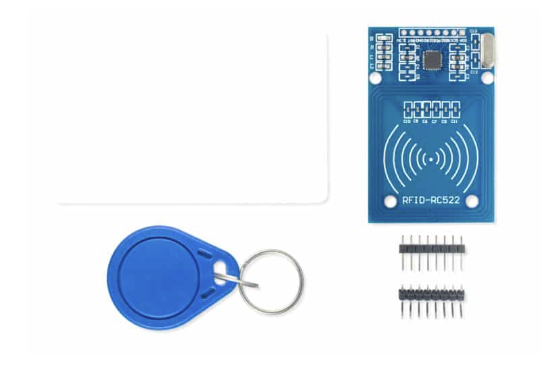
    
**Download the mfrc22 Library**.  from the link 

https://github.com/wendlers/micropython-mfrc522/blob/master/mfrc522.py

#### Example Code
    from mfrc522 import MFRC522
    import time
     
    reader = MFRC522(spi_id=0,sck=6,miso=4,mosi=7,cs=5,rst=22)
     
    print("Bring TAG closer...")
    print("")
     
     
    while True:
        reader.init()
        (stat, tag_type) = reader.request(reader.REQIDL)
        if stat == reader.OK:
            (stat, uid) = reader.SelectTagSN()
            if stat == reader.OK:
                card = int.from_bytes(bytes(uid),"little",False)
                print("CARD ID: "+str(card))
            time.sleep_ms(500) 

###  Scenario: Read RFID Card and Store Data in Supabase
You are working for a tech startup, setting up a simple attendance system for their small office.
Each employee is given an RFID card. When they arrive, they scan their card, and the system logs their name and card ID to an online Supabase database.

You’ve been asked to build and test the basic functionality of this system: reading RFID cards and uploading the data to Supabase.
Use an RFID-RC522 module with a Raspberry Pi Pico W to scan RFID cards. When a card is detected, send the UID along with the person's first and last name to a Supabase database.

### Hardware Requirements
1. Breadboard
2. Pi Pico
3. MFRC522 RFID module
4. RFID card/tag
5. Internet access
6. Jumper wires

## Task - 4  RFID Card Authorisation System with LED Feedback

###  Scenario:
You are an IoT developer tasked with creating a basic access control system for a school’s staff room. Staff members are given RFID cards. When they scan their card at the door, the system should:

➡️ Allow entry if their card is registered (green LED on).

➡️ Deny access if their card is not found in the database (red LED on).

The system uses a Supabase database to verify card numbers and an RGB LED for visual status feedback.

#### Objective:
Build an RFID-based access control system using a Raspberry Pi Pico W and an MFRC522 RFID module. When a card is scanned, the system checks if the card is in the Supabase database and turns on a green LED if authorised or a red LED if not.

### Hardware Requirements
1. Breadboard
2. Pi Pico
3. MFRC522 RFID module
4. RFID card/tag
5. LED light (Green, Red)
6. Internet access
7. Jumper wires
